### Importing packages and modules

In [1]:
import re
import nltk
import string
import spacy

import numpy as np 
import pandas as pd
from spacy import displacy
import texthero as hero

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, f1_score, precision_score, recall_score
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to C:\Users\Bhavesh
[nltk_data]     Kilaru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Bhavesh
[nltk_data]     Kilaru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### loading the data

In [2]:
twitter_training = pd.read_csv("C:/Users/Bhavesh Kilaru/Downloads/twitter_training.csv", names=["id", "entity", "sentiment", "text"])
twitter_test = pd.read_csv("C:/Users/Bhavesh Kilaru/Downloads/twitter_validation.csv", names=["id", "entity", "sentiment", "text"])

### Insights from the data

In [3]:
twitter_original = twitter_training.copy()
twitter_training.head(5)

,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
twitter_training.shape

(74682, 4)

In [5]:
twitter_test.shape

(1000, 4)

In [6]:
initial_text_example = twitter_training['text'][0]

In [7]:
np.unique(twitter_training['entity'])

array(['Amazon', 'ApexLegends', 'AssassinsCreed', 'Battlefield',
       'Borderlands', 'CS-GO', 'CallOfDuty', 'CallOfDutyBlackopsColdWar',
       'Cyberpunk2077', 'Dota2', 'FIFA', 'Facebook', 'Fortnite', 'Google',
       'GrandTheftAuto(GTA)', 'Hearthstone', 'HomeDepot',
       'LeagueOfLegends', 'MaddenNFL', 'Microsoft', 'NBA2K', 'Nvidia',
       'Overwatch', 'PlayStation5(PS5)',
       'PlayerUnknownsBattlegrounds(PUBG)', 'RedDeadRedemption(RDR)',
       'TomClancysGhostRecon', 'TomClancysRainbowSix', 'Verizon',
       'WorldOfCraft', 'Xbox(Xseries)', 'johnson&johnson'], dtype=object)

#### Distribution of samples

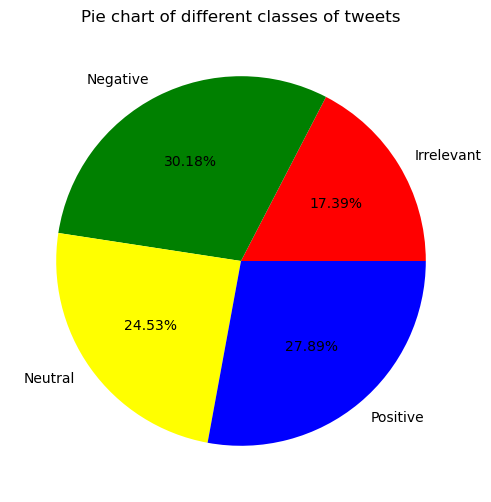

In [8]:
targets = twitter_training.groupby('sentiment').size()
targets.plot(kind='pie', subplots=True, figsize=(6,6), autopct = "%.2f%%", colors=['red','green', 'yellow', 'blue'])
plt.title("Pie chart of different classes of tweets")
plt.ylabel("")
plt.show()

### Initial Pre processing of Data

In [9]:
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text) # Remove special char
    text = re.sub(r'<.*?>', '', text) # Remove html tags
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    len_token = len(tokens)
    
    text = ' '.join(tokens)
    
    return text, len_token

In [10]:
def get_length_and_preprocess(tweet_df, data_type):
    tweet_text = []
    tweet_length = []
    tweet_df['text'] = tweet_df['text'].astype(str)
    
    processing = tweet_df['text'].apply(normalize_text)
    
    for text, len_ in processing:
        tweet_text.append(text)
        tweet_length.append(len_)
        
    print(f"The average length of {data_type} data is {np.mean(np.array(tweet_length))}")
    print(f"The maximum length of {data_type} data is {max(tweet_length)}")
    tweet_df['text'] = tweet_text
    return tweet_df

In [11]:
twitter_training = get_length_and_preprocess(twitter_training, "train")
twitter_test = get_length_and_preprocess(twitter_test, "test")

The average length of train data is 10.667443292895209
The maximum length of train data is 163
The average length of test data is 12.59
The maximum length of test data is 39


In [12]:
twitter_training = twitter_training[(twitter_training["sentiment"] == "Positive") | 
                                    (twitter_training["sentiment"] == "Negative")]
twitter_test = twitter_test[(twitter_test["sentiment"] == "Positive") | 
                                    (twitter_test["sentiment"] == "Negative")]

In [13]:
twitter_training["sentiment"].replace("Positive", 1, inplace=True)
twitter_training["sentiment"].replace("Negative", 0, inplace=True)
twitter_test["sentiment"].replace("Positive", 1, inplace=True)
twitter_test["sentiment"].replace("Negative", 0, inplace=True)

In [14]:
twitter_training.head()

,id,entity,sentiment,text
0,2401,Borderlands,1,im get borderland murder
1,2401,Borderlands,1,come border kill
2,2401,Borderlands,1,im get borderland kill
3,2401,Borderlands,1,im come borderland murder
4,2401,Borderlands,1,im get borderland murder


In [15]:
twitter_training.shape

(43374, 4)

In [16]:
twitter_test.shape

(543, 4)

#### storing pre processed data in pickle files

In [17]:
import pickle
with open('df_processed_2.pkl', 'wb') as file:
  # A new file will be created
    pickle.dump(twitter_training, file)

In [18]:
with open('df_test_processed_2.pkl', 'wb') as file:
  # A new file will be created
    pickle.dump(twitter_test, file)

### Word Clouds of pre processed data

Text(0.5, 1.0, 'Word cloud of positive tweets.')

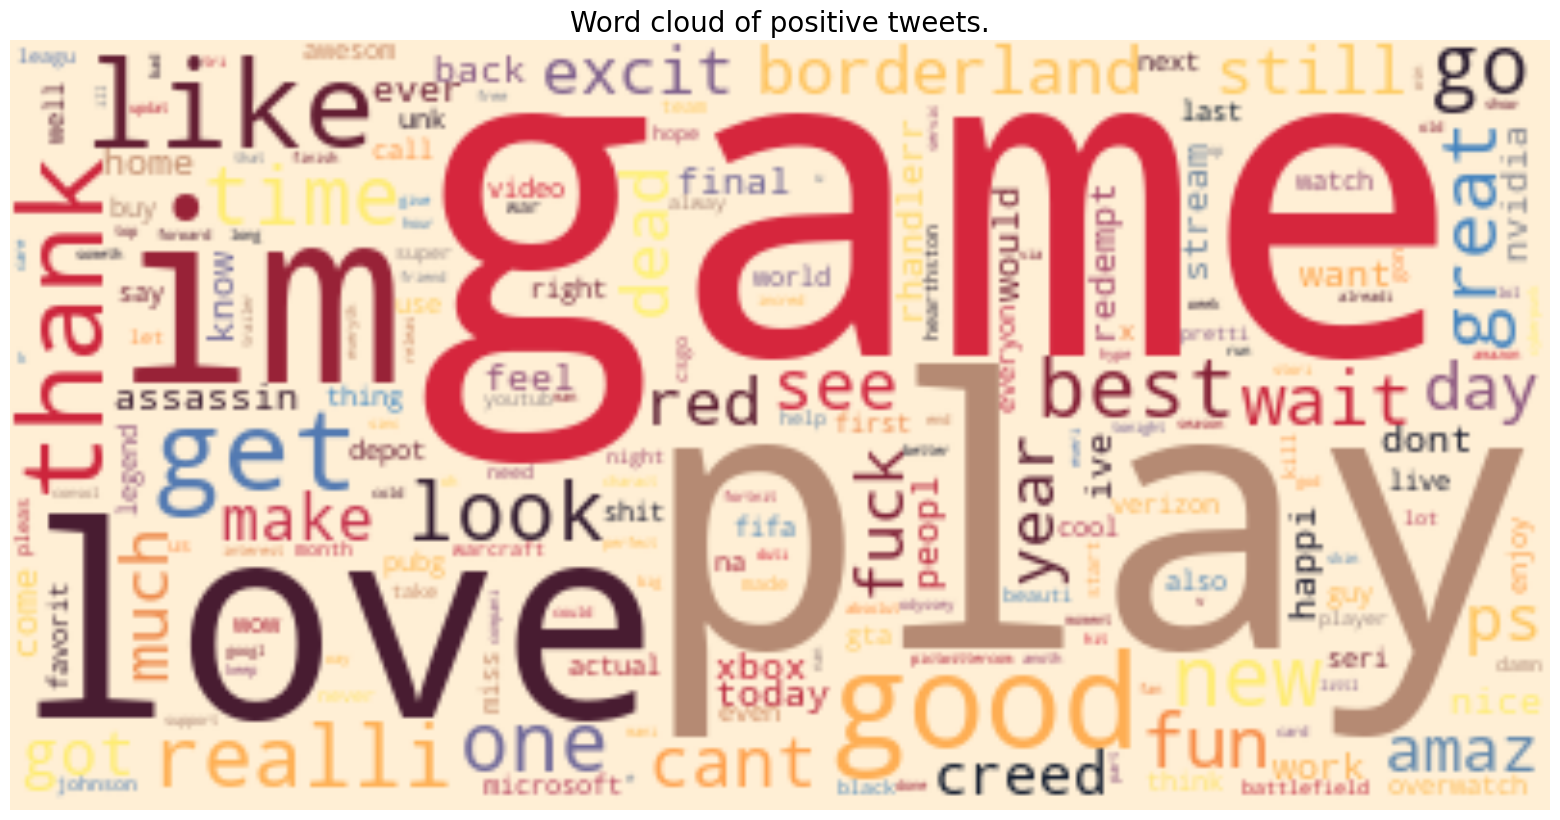

In [19]:
#Word map for Positive tweets
hero.wordcloud(twitter_training[twitter_training['sentiment'] == 1]['text'])
plt.title('Word cloud of positive tweets.',fontsize=20)

Text(0.5, 1.0, 'Word Cloud of negative tweets.')

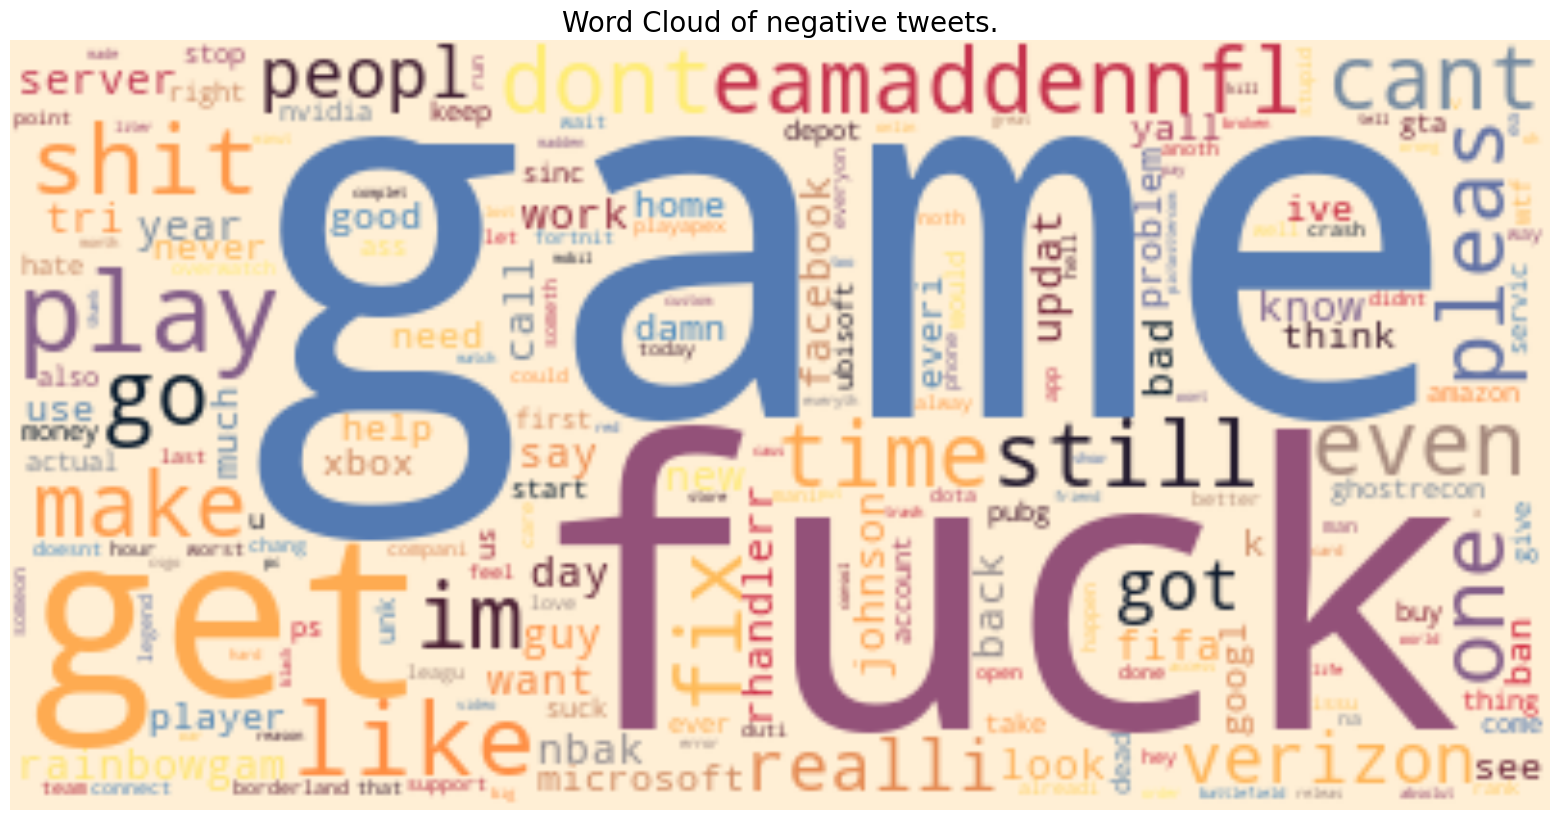

In [20]:
#Word map for Negative tweets
hero.wordcloud(twitter_training[twitter_training['sentiment'] == 0]['text'])
plt.title('Word Cloud of negative tweets.',fontsize=20)

### Dividing the data between Train and Validation splits

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(twitter_training['text'], twitter_training["sentiment"], random_state=42, stratify=twitter_training["sentiment"], test_size=0.2)

### Fitting the Tokenizer

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(filters='@', split = " ")
tokenizer.fit_on_texts(X_train)

print('No. of distinct tokens = '+str(len(tokenizer.word_index)))

No. of distinct tokens = 16163


In [23]:
# Define Vocabulary size (no. of most frequent tokens) to consider
vocab_size =1000

# Reload Twitter dataset with new Vocabulary
tokenizer = Tokenizer(num_words=vocab_size,filters='@')
tokenizer.fit_on_texts(X_train)

In [24]:
# Vectorize input text using Vocabulary

X_train_vectorized = tokenizer.texts_to_sequences(X_train)
X_valid_vectorized = tokenizer.texts_to_sequences(X_valid)
X_test_vectorized = tokenizer.texts_to_sequences(twitter_test['text'])

### Padding the Sequences

In [25]:
max_length=100

from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_padded = pad_sequences(sequences = X_train_vectorized, maxlen = max_length, padding = 'post', truncating = 'post')
X_valid_padded = pad_sequences(sequences = X_valid_vectorized, maxlen = max_length, padding = 'post', truncating = 'post')
X_test_padded = pad_sequences(sequences = X_test_vectorized, maxlen = max_length, padding = 'post', truncating = 'post')

In [26]:
print("Train shape:", X_train_padded.shape)
print("valid shape:", X_valid_padded.shape)
print("Test shape:", X_test_padded.shape)

Train shape: (34699, 100)
valid shape: (8675, 100)
Test shape: (543, 100)


### Example of Pre Processing

In [27]:
print(f"Initial text :- \t\t\t\t {initial_text_example}")

initial_preprocess_example = normalize_text(initial_text_example)
print(f"The output after initial pre processing is :- \t {initial_preprocess_example}")

tokenized_ex = tokenizer.texts_to_sequences([initial_preprocess_example[0]])
final_preprocess_example = pad_sequences(sequences = tokenized_ex, maxlen = max_length, padding = 'post', truncating = 'post')
print(f"The output after final pre processing is :- ")
final_preprocess_example

Initial text :- 				 im getting on borderlands and i will murder you all ,
The output after initial pre processing is :- 	 ('im get borderland murder', 4)
The output after final pre processing is :- 


array([[ 5,  3, 49,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0]])

### Importing the TensorFlow modules

In [28]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM, GRU, concatenate, SpatialDropout1D
from tensorflow.keras import utils, layers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import L2
from tensorflow.keras import Input, Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import roc_auc_score

### Using the embeddings

In [29]:
embeddings_index = dict()
f = open('C:/Users/Bhavesh Kilaru/Desktop/DSA 5900 Practicum/glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [30]:
# Create Word Embedding Matrix

embedding_matrix = np.zeros((vocab_size, 100))
for i in range(1,vocab_size):
    embedding_vector = embeddings_index.get(tokenizer.index_word[i])
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

### Model 1

In [31]:
# Model 1

def Model_twitter_Classification(max_length, vocab_size, embedding_matrix):
    '''
    Function to create model for tweets classification
    '''
    # defining kernel initializer and regularizer
    initializer = HeNormal()
    regularizer = L2(l2=0.01)

    # clearing backend session
    tf.keras.backend.clear_session()
    
    input_layer = Input(shape=(max_length, ))
    
    embedding = Embedding(input_dim =vocab_size, output_dim = 100, input_length = max_length, weights=[embedding_matrix], 
                          mask_zero=True, trainable=False)(input_layer)
    
    Bidirectional_RNN = tf.keras.layers.Bidirectional(LSTM(64,name='LSTM'))(embedding)
    
    Regularizer = tf.keras.layers.Dropout(0.5)(Bidirectional_RNN)
                                                      
    output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(Regularizer)
                                                      
    model = Model(inputs = input_layer, outputs = output_layer)
                                                      
    return model

In [32]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [33]:
def train_model():

  model = Model_twitter_Classification(max_length, vocab_size, embedding_matrix)
  model.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=tf.keras.metrics.BinaryAccuracy())

#   logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#   tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    
  history  = model.fit(x = X_train_padded,
                        y = y_train,
                        batch_size=16,
                        epochs=15,
                        validation_data= (X_valid_padded, y_valid),
                        callbacks = [early_stopping],
                        verbose="auto")

  return model, history

model1, history1 = train_model()

Epoch 1/15
2169/2169 [==============================] - 253s 110ms/step - loss: 0.5001 - binary_accuracy: 0.7457 - val_loss: 0.4529 - val_binary_accuracy: 0.7807
Epoch 2/15
2169/2169 [==============================] - 235s 108ms/step - loss: 0.4180 - binary_accuracy: 0.8004 - val_loss: 0.4020 - val_binary_accuracy: 0.8088
Epoch 3/15
2169/2169 [==============================] - 221s 102ms/step - loss: 0.3619 - binary_accuracy: 0.8331 - val_loss: 0.3674 - val_binary_accuracy: 0.8272
Epoch 4/15
2169/2169 [==============================] - 218s 100ms/step - loss: 0.3126 - binary_accuracy: 0.8564 - val_loss: 0.3348 - val_binary_accuracy: 0.8470
Epoch 5/15
2169/2169 [==============================] - 217s 100ms/step - loss: 0.2716 - binary_accuracy: 0.8758 - val_loss: 0.3300 - val_binary_accuracy: 0.8527
Epoch 6/15
2169/2169 [==============================] - 220s 102ms/step - loss: 0.2420 - binary_accuracy: 0.8882 - val_loss: 0.3138 - val_binary_accuracy: 0.8621
Epoch 7/15
2169/2169 [======

In [34]:
model1.evaluate(X_test_padded,twitter_test['sentiment'])

17/17 [==============================] - 1s 35ms/step - loss: 0.1367 - binary_accuracy: 0.9521


[0.13666445016860962, 0.9521178603172302]

In [35]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 100)          100000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 184,609
Trainable params: 84,609
Non-trainable params: 100,000
__________________________________________________

In [36]:
test_prediction_1 = model1.predict(X_test_padded)

17/17 [==============================] - 6s 39ms/step


In [37]:
print(f"F1 score :- {f1_score(twitter_test['sentiment'], test_prediction_1 > 0.5)}")
print(f"prescesion :- {precision_score(twitter_test['sentiment'], test_prediction_1 > 0.5)}")
print(f"Recall :- {recall_score(twitter_test['sentiment'], test_prediction_1 > 0.5)}")
cf_mat = confusion_matrix(twitter_test['sentiment'], np.round(test_prediction_1))
print('Confusion matrix')
print(cf_mat)

F1 score :- 0.9528985507246377
prescesion :- 0.9563636363636364
Recall :- 0.9494584837545126
Confusion matrix
[[254  12]
 [ 14 263]]


Text(0.5, 1.0, 'ROC Curve for Centralized learning')

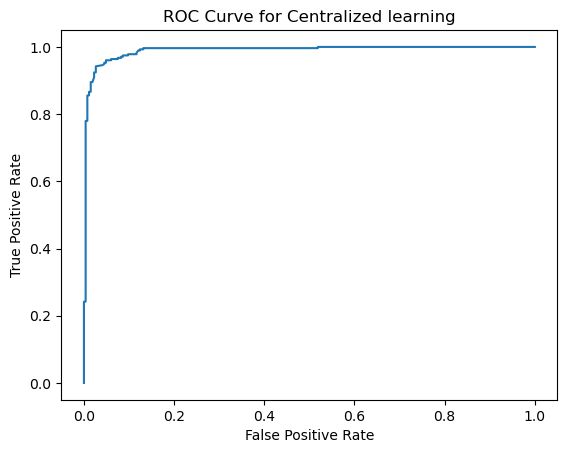

In [38]:
fpr_1, tpr_1, thresholds_1 = roc_curve(twitter_test['sentiment'], test_prediction_1)
plt.plot(fpr_1, tpr_1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Centralized learning")

In [39]:
auc_1= roc_auc_score(twitter_test['sentiment'], test_prediction_1)
print(f'model 2 AUC score: {auc_1}')

model 2 AUC score: 0.9894343258869194


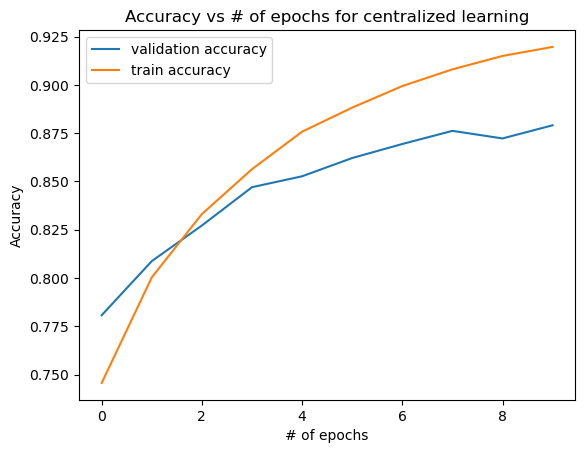

In [40]:
plt.plot(history1.history['val_binary_accuracy'], label = 'validation accuracy')
plt.plot(history1.history['binary_accuracy'], label = "train accuracy")
plt.legend()
plt.xlabel("# of epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs # of epochs for centralized learning")
plt.show()

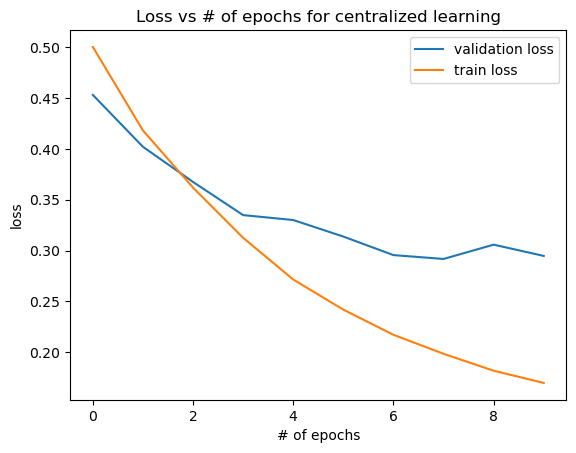

In [41]:
plt.plot(history1.history['val_loss'], label = 'validation loss')
plt.plot(history1.history['loss'], label = "train loss")
plt.legend()
plt.xlabel("# of epochs")
plt.ylabel("loss")
plt.title("Loss vs # of epochs for centralized learning")
plt.show()

Text(0.5, 0.98, 'Graphs for Model1')

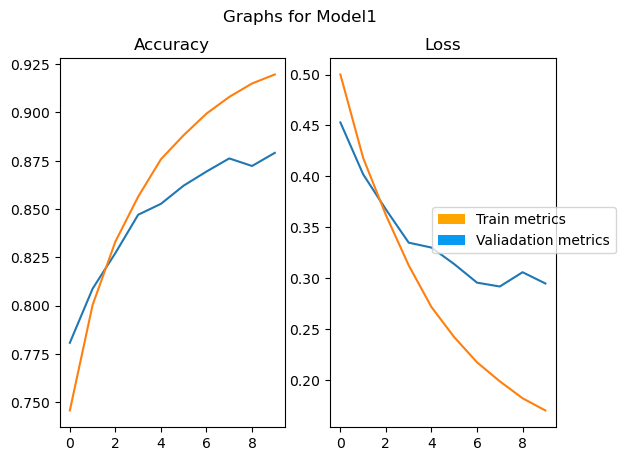

In [42]:
figure, axis = plt.subplots(1, 2)
handles = [
    Patch(facecolor="#FFA500", label= "Train metrics"),
    Patch(facecolor="#069AF3", label="Valiadation metrics")
]

axis[0].plot(history1.history['val_binary_accuracy'], label = 'validation accuracy')
axis[0].plot(history1.history['binary_accuracy'], label = "train accuracy")
axis[0].set_title("Accuracy")

axis[1].plot(history1.history['val_loss'], label = 'validation loss')
axis[1].plot(history1.history['loss'], label = "train loss")
axis[1].set_title("Loss")
figure.legend(handles=handles, loc='center right')

figure.suptitle('Graphs for Model1')

### model 2

In [43]:
def Model_twitter_Classification(max_length, vocab_size, embedding_matrix):
    initializer = HeNormal()
    regularizer = L2(l2=0.01)
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(100,)),
        Embedding(input_dim=vocab_size,output_dim=100,input_length=max_length,weights=[embedding_matrix],trainable=False),
        SpatialDropout1D(0.2),
        Conv1D(64, 5, activation='relu'),
        layers.BatchNormalization(),
        Conv1D(64, 5, activation='relu'),
        layers.BatchNormalization(),
        #layers.Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences = True)),
        layers.Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
        layers.BatchNormalization(),
        Dense(512, activation='relu',kernel_initializer=initializer,kernel_regularizer=regularizer),
        Dropout(0.5),
        Dense(512, activation='relu',kernel_initializer=initializer,kernel_regularizer=regularizer),
        Dense(1, activation='sigmoid', use_bias=True)
    ])
    return model

In [44]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [45]:
def train_model():

  model = Model_twitter_Classification(max_length, vocab_size, embedding_matrix)
  model.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=tf.keras.metrics.BinaryAccuracy())

#   logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#   tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    
  history  = model.fit(x = X_train_padded,
                        y = y_train,
                        batch_size=16,
                        epochs=15,
                        validation_data= (X_valid_padded, y_valid),
                        callbacks = [early_stopping],
                        verbose="auto")

  return model, history

model_2, history_2 = train_model()

C:\Users\Bhavesh Kilaru\AppData\Roaming\Python\Python39\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/15
2169/2169 [==============================] - 421s 188ms/step - loss: 1.8927 - binary_accuracy: 0.6830 - val_loss: 0.5409 - val_binary_accuracy: 0.7516
Epoch 2/15
2169/2169 [==============================] - 389s 179ms/step - loss: 0.5509 - binary_accuracy: 0.7457 - val_loss: 0.4829 - val_binary_accuracy: 0.7744
Epoch 3/15
2169/2169 [==============================] - 367s 169ms/step - loss: 0.5087 - binary_accuracy: 0.7698 - val_loss: 0.4786 - val_binary_accuracy: 0.7899
Epoch 4/15
2169/2169 [==============================] - 377s 174ms/step - loss: 0.4797 - binary_accuracy: 0.7844 - val_loss: 0.4458 - val_binary_accuracy: 0.8012
Epoch 5/15
2169/2169 [==============================] - 365s 168ms/step - loss: 0.4524 - binary_accuracy: 0.7973 - val_loss: 0.4618 - val_binary_accuracy: 0.7801
Epoch 6/15
2169/2169 [==============================] - 305s 141ms/step - loss: 0.4328 - binary_accuracy: 0.8084 - val_loss: 0.4226 - val_binary_accuracy: 0.8137
Epoch 7/15
2169/2169 [======

In [46]:
model_2.evaluate(X_test_padded,twitter_test['sentiment'])

17/17 [==============================] - 0s 22ms/step - loss: 0.2609 - binary_accuracy: 0.8950


[0.26092836260795593, 0.8950276374816895]

In [47]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          100000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 100)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 96, 64)            32064     
                                                                 
 batch_normalization (BatchN  (None, 96, 64)           256       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 64)            20544     
                                                                 
 batch_normalization_1 (Batc  (None, 92, 64)           2

In [48]:
test_prediction_2 = model_2.predict(X_test_padded)

17/17 [==============================] - 1s 19ms/step


In [49]:
print(f"F1 score :- {f1_score(twitter_test['sentiment'], test_prediction_2 > 0.5)}")
print(f"prescesion :- {precision_score(twitter_test['sentiment'], test_prediction_2 > 0.5)}")
print(f"Recall :- {recall_score(twitter_test['sentiment'], test_prediction_2 > 0.5)}")
cf_mat_2 = confusion_matrix(twitter_test['sentiment'], np.round(test_prediction_2))
print('Confusion matrix')
print(cf_mat_2)

F1 score :- 0.9008695652173913
prescesion :- 0.8691275167785235
Recall :- 0.9350180505415162
Confusion matrix
[[227  39]
 [ 18 259]]


Text(0.5, 1.0, 'ROC Curve for Centralized learning for model 2')

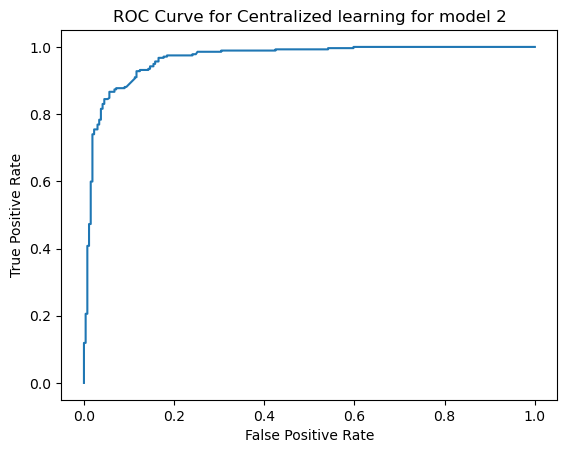

In [50]:
fpr_2, tpr_2, thresholds_2 = roc_curve(twitter_test['sentiment'], test_prediction_2)
plt.plot(fpr_2, tpr_2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Centralized learning for model 2")

In [51]:
auc_2= roc_auc_score(twitter_test['sentiment'], test_prediction_2)
print(f'model 2 AUC score: {auc_2}')

model 2 AUC score: 0.964957520154176


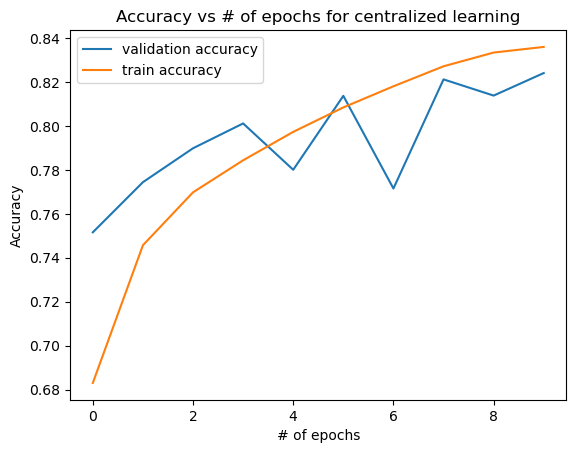

In [52]:
plt.plot(history_2.history['val_binary_accuracy'], label = 'validation accuracy')
plt.plot(history_2.history['binary_accuracy'], label = "train accuracy")
plt.legend()
plt.xlabel("# of epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs # of epochs for centralized learning")
plt.show()

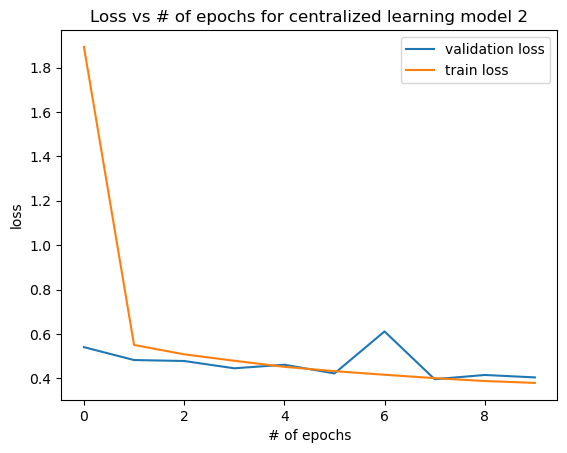

In [53]:
plt.plot(history_2.history['val_loss'], label = 'validation loss')
plt.plot(history_2.history['loss'], label = "train loss")
plt.legend()
plt.xlabel("# of epochs")
plt.ylabel("loss")
plt.title("Loss vs # of epochs for centralized learning model 2")
plt.show()

Text(0.5, 0.98, 'Graphs for Model2')

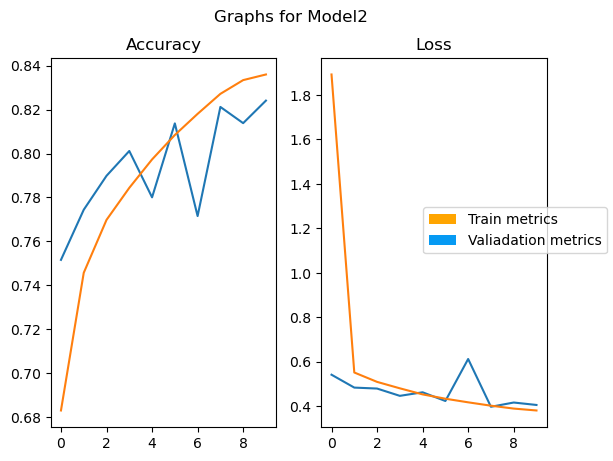

In [54]:
figure, axis = plt.subplots(1, 2)
handles = [
    Patch(facecolor="#FFA500", label= "Train metrics"),
    Patch(facecolor="#069AF3", label="Valiadation metrics")
]

axis[0].plot(history_2.history['val_binary_accuracy'], label = 'validation accuracy')
axis[0].plot(history_2.history['binary_accuracy'], label = "train accuracy")
axis[0].set_title("Accuracy")

axis[1].plot(history_2.history['val_loss'], label = 'validation loss')
axis[1].plot(history_2.history['loss'], label = "train loss")
axis[1].set_title("Loss")
figure.legend(handles=handles, loc='center right')

figure.suptitle('Graphs for Model2')

### Model 3

In [55]:
def Model_twitter_Classification(max_length, vocab_size, embedding_matrix):
    initializer = HeNormal()
    regularizer = L2(l2=0.01)
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(100,)),
        Embedding(input_dim=vocab_size,output_dim=100,input_length=max_length,weights=[embedding_matrix],trainable=False),
        SpatialDropout1D(0.2),
        Conv1D(64, 5, activation='relu'),
        #layers.BatchNormalization(),
        Conv1D(64, 5, activation='relu'),
        #layers.BatchNormalization(),
        #layers.Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences = True)),
        layers.Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
        #layers.BatchNormalization(),
        Dense(512, activation='relu',kernel_initializer=initializer,kernel_regularizer=regularizer),
        Dropout(0.5),
        Dense(512, activation='relu',kernel_initializer=initializer,kernel_regularizer=regularizer),
        Dense(1, activation='sigmoid', use_bias=True)
    ])
    return model

In [56]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [57]:
def train_model():

  model = Model_twitter_Classification(max_length, vocab_size, embedding_matrix)
  model.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=tf.keras.metrics.BinaryAccuracy())

#   logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#   tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    
  history  = model.fit(x = X_train_padded,
                        y = y_train,
                        batch_size=16,
                        epochs=15,
                        validation_data= (X_valid_padded, y_valid),
                        callbacks = [early_stopping],
                        verbose="auto")

  return model, history

model3, history3 = train_model()

Epoch 1/15


C:\Users\Bhavesh Kilaru\AppData\Roaming\Python\Python39\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


2169/2169 [==============================] - 390s 178ms/step - loss: 1.0915 - binary_accuracy: 0.7227 - val_loss: 0.5057 - val_binary_accuracy: 0.7775
Epoch 2/15
2169/2169 [==============================] - 246s 113ms/step - loss: 0.4804 - binary_accuracy: 0.7828 - val_loss: 0.4506 - val_binary_accuracy: 0.7993
Epoch 3/15
2169/2169 [==============================] - 227s 105ms/step - loss: 0.4291 - binary_accuracy: 0.8120 - val_loss: 0.4128 - val_binary_accuracy: 0.8165
Epoch 4/15
2169/2169 [==============================] - 229s 105ms/step - loss: 0.3937 - binary_accuracy: 0.8293 - val_loss: 0.3985 - val_binary_accuracy: 0.8231
Epoch 5/15
2169/2169 [==============================] - 230s 106ms/step - loss: 0.3672 - binary_accuracy: 0.8443 - val_loss: 0.3999 - val_binary_accuracy: 0.8249
Epoch 6/15
2169/2169 [==============================] - 395s 182ms/step - loss: 0.3455 - binary_accuracy: 0.8547 - val_loss: 0.4001 - val_binary_accuracy: 0.8281


In [58]:
model3.evaluate(X_test_padded,twitter_test['sentiment'])

17/17 [==============================] - 1s 42ms/step - loss: 0.2577 - binary_accuracy: 0.9245


[0.25766846537590027, 0.9244935512542725]

In [59]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          100000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 100, 100)         0         
 lDropout1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 64)            32064     
                                                                 
 conv1d_3 (Conv1D)           (None, 92, 64)            20544     
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 512)              

In [60]:
test_prediction_3 = model3.predict(X_test_padded)

17/17 [==============================] - 2s 36ms/step


In [61]:
print(f"F1 score :- {f1_score(twitter_test['sentiment'], test_prediction_3 > 0.5)}")
print(f"prescesion :- {precision_score(twitter_test['sentiment'], test_prediction_3 > 0.5)}")
print(f"Recall :- {recall_score(twitter_test['sentiment'], test_prediction_3 > 0.5)}")
cf_mat_3 = confusion_matrix(twitter_test['sentiment'], np.round(test_prediction_3))
print('Confusion matrix')
print(cf_mat_3)

F1 score :- 0.9279437609841829
prescesion :- 0.9041095890410958
Recall :- 0.9530685920577617
Confusion matrix
[[238  28]
 [ 13 264]]


Text(0.5, 1.0, 'ROC Curve for Centralized learning Model 3')

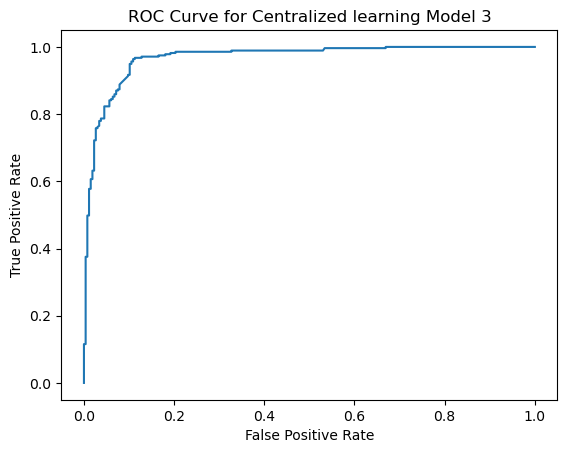

In [62]:
fpr_3, tpr_3, thresholds_3 = roc_curve(twitter_test['sentiment'], test_prediction_3)
plt.plot(fpr_3, tpr_3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Centralized learning Model 3")

In [63]:
auc_3= roc_auc_score(twitter_test['sentiment'], test_prediction_3)
print(f'model 2 AUC score: {auc_3}')

model 2 AUC score: 0.9679161803425531


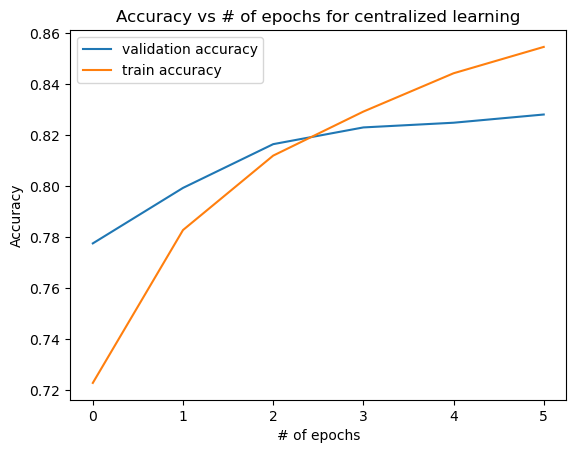

In [64]:
plt.plot(history3.history['val_binary_accuracy'], label = 'validation accuracy')
plt.plot(history3.history['binary_accuracy'], label = "train accuracy")
plt.legend()
plt.xlabel("# of epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs # of epochs for centralized learning")
plt.show()

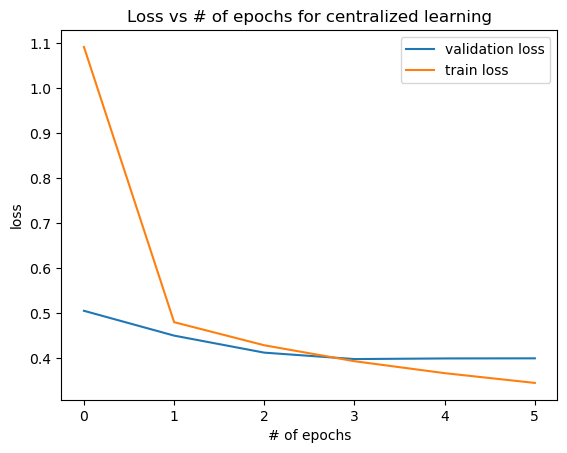

In [65]:
plt.plot(history3.history['val_loss'], label = 'validation loss')
plt.plot(history3.history['loss'], label = "train loss")
plt.legend()
plt.xlabel("# of epochs")
plt.ylabel("loss")
plt.title("Loss vs # of epochs for centralized learning")
plt.show()

Text(0.5, 0.98, 'Graphs for Model3')

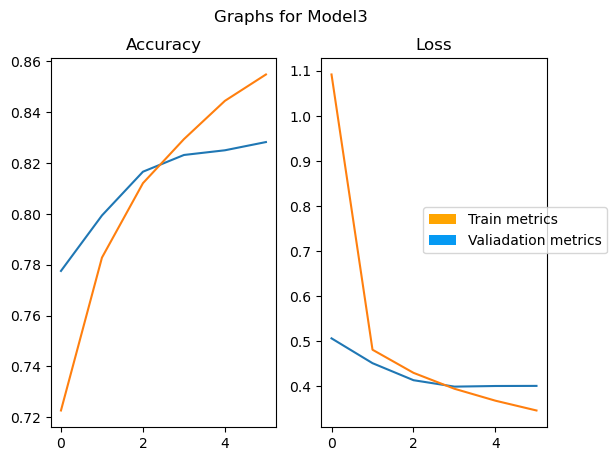

In [66]:
figure, axis = plt.subplots(1, 2)
handles = [
    Patch(facecolor="#FFA500", label= "Train metrics"),
    Patch(facecolor="#069AF3", label="Valiadation metrics")
]

axis[0].plot(history3.history['val_binary_accuracy'], label = 'validation accuracy')
axis[0].plot(history3.history['binary_accuracy'], label = "train accuracy")
axis[0].set_title("Accuracy")

axis[1].plot(history3.history['val_loss'], label = 'validation loss')
axis[1].plot(history3.history['loss'], label = "train loss")
axis[1].set_title("Loss")
figure.legend(handles=handles, loc='center right')

figure.suptitle('Graphs for Model3')

### ROC_AUC for three curves

Text(0.5, 1.0, 'ROC Curve for Centralized learning for three model')

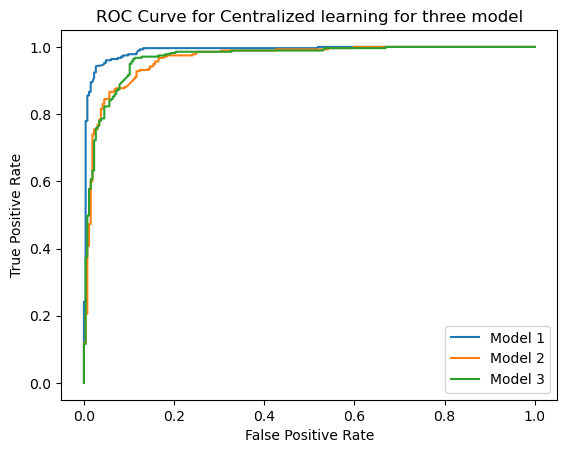

In [68]:
plt.plot(fpr_1, tpr_1, label = "Model 1")
plt.plot(fpr_2, tpr_2, label = "Model 2")
plt.plot(fpr_3, tpr_3, label = "Model 3")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Centralized learning for three models")